In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### 1. Import the dataset and understand it.

In [106]:
loan = pd.read_csv('loan.csv')
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,4 years,...,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,3 years,...,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,< 1 year,...,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,< 1 year,...,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00,NaN,NaN


### 2. List down the number of rows and columns.

In [107]:
loan.shape

(39717, 23)

### 3. ‘Int_rate’ column is character type. With the help of lambda function convert into float type.

In [108]:
loan["int_rate"] = loan["int_rate"].apply(lambda x:x.replace("%","")).astype(float)

In [109]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


### 4. Check the datatype of each column.

In [110]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  float64
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

### 5. Cleaning the dataset- Remove the columns having complete NaN value in the entire dataset.


In [111]:
loan=loan.dropna(how="all",axis=1)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


In [112]:
loan.shape

(39717, 21)

### 6. Write the code to find the value counts of the ‘loan_status’ category column and filter only the ‘fully paid’ and ‘charged off’ categories.

In [113]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [114]:
loan[loan['loan_status']!='Current']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,...,Source Verified,Fully Paid,wedding,11.20,5632.210000,5632.21,5000.00,632.21,Jan-15,161.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,4 years,...,Not Verified,Fully Paid,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,3 years,...,Not Verified,Fully Paid,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,< 1 year,...,Not Verified,Fully Paid,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,< 1 year,...,Not Verified,Fully Paid,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00


### 7. Filter the ‘Emp_Len’ column to extract the numerical value from the string. Hint - Emp_len : < 1year, 2 years , 3 years as 1 , 2, 3 so on.

In [115]:
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [116]:
loan.emp_length = loan.emp_length.str.replace("<","",regex=True).str.replace("years","",regex=True).str.replace("year","",regex=True).str.replace("+","",regex=True)

In [98]:
loan["emp_length"]=loan["emp_length"].astype(float)

In [99]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10.0,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,1.0,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10.0,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10.0,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1.0,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


In [101]:
loan["emp_length"].isnull().sum()

1075

In [102]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,38642.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,5.092050,6.896893e+04,13.315130,12153.596544,11567.149118,9793.348813,2263.663172,2678.826162
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,3.408338,6.379377e+04,6.678594,9042.040766,8942.672613,7065.522127,2608.111964,4447.136012
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,2.000000,4.040400e+04,8.170000,5576.930000,5112.310000,4600.000000,662.180000,218.680000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,4.000000,5.900000e+04,13.400000,9899.640319,9287.150000,8000.000000,1348.910000,546.140000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,9.000000,8.230000e+04,18.600000,16534.433040,15798.810000,13653.260000,2833.400000,3293.160000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,58563.679930,58563.680000,35000.020000,23563.680000,36115.200000


In [68]:
loan["emp_length"]=loan["emp_length"].fillna(loan.emp_length.median())

In [69]:
loan["emp_length"]=loan["emp_length"].astype(int)

### 8. Using the Lambda function, remove the month from the ‘term’ column such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.


In [44]:
loan.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [45]:
loan["term"] = loan["term"].apply(lambda x:x.replace("months","")).astype(int)

In [46]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,10,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,10,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,1,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


### 9. Create a new column as risky_loan_applicant by comparing loan_amnt and funded_amnt with the following criteria - If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as ‘1’.

In [47]:
loan['risky_loan'] = [1 if i>j else 0 for i,j in zip(loan['loan_amnt'],loan['funded_amnt'])]

In [48]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,risky_loan
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10,...,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1,...,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,10,...,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,10,...,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,1,...,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,0


In [49]:
loan[loan.risky_loan>0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,risky_loan
61,1068934,1277395,17500,8950,8925.000000,60,17.27,223.74,D,6,...,Fully Paid,small_business,19.47,13227.100010,13190.15,8950.00,4277.10,Feb-16,2487.58,1
66,1069093,1303740,12500,8925,8925.000000,60,17.27,223.11,D,5,...,Charged Off,debt_consolidation,13.16,5577.750000,5577.75,2812.82,2742.43,Feb-14,223.11,1
70,1069043,1303486,20975,13575,13550.000000,60,17.58,341.63,D,5,...,Fully Paid,credit_card,18.79,18112.460870,18079.10,13575.00,4537.46,Apr-14,9245.21,1
77,1068416,1302799,7250,7200,7175.000000,60,21.67,197.51,F,1,...,Fully Paid,debt_consolidation,24.82,8204.774089,8176.29,7200.00,1004.77,Sep-12,6824.70,1
80,1068994,1303432,35000,22075,22050.000000,60,17.27,551.84,D,3,...,Fully Paid,home_improvement,7.51,28887.100070,28854.39,22075.00,6812.10,Feb-14,15660.22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39533,167645,163382,10000,6000,700.000000,36,8.70,189.97,B,3,...,Fully Paid,debt_consolidation,19.45,6778.258742,790.80,6000.00,778.26,Apr-10,3.94,1
39593,141774,141767,20000,4800,1949.999594,36,13.12,162.01,D,8,...,Charged Off,debt_consolidation,16.87,1605.300000,651.62,1028.79,427.59,Aug-08,162.01,1
39600,140036,140027,4000,1000,550.000000,36,9.96,32.25,B,1,...,Charged Off,other,5.83,868.810000,477.36,719.90,148.91,Jan-10,32.25,1
39601,139980,139977,12000,5000,1399.996684,36,10.91,163.49,C,1,...,Charged Off,other,11.78,4820.710000,1347.19,3891.56,844.02,Mar-10,163.49,1


### Using the bar plot visualize the loan_status column against categorical column grade, term, verification_status . Write the observation from each graph.

In [60]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,risky_loan
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10,...,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1,...,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,10,...,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,10,...,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,1,...,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,0


In [51]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

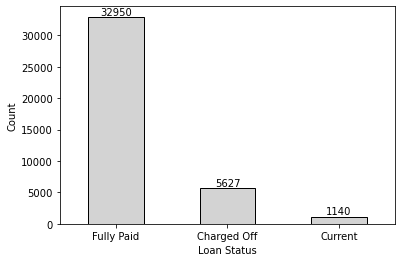

In [53]:
loan.loan_status.value_counts().plot(kind="bar",rot=0,color="lightgrey",edgecolor="black")
for i in range(len(loan.loan_status.value_counts())):
    plt.text(i,loan.loan_status.value_counts()[i],loan.loan_status.value_counts()[i],ha="center",va="bottom")
plt.xlabel("Loan Status")
plt.ylabel("Count")

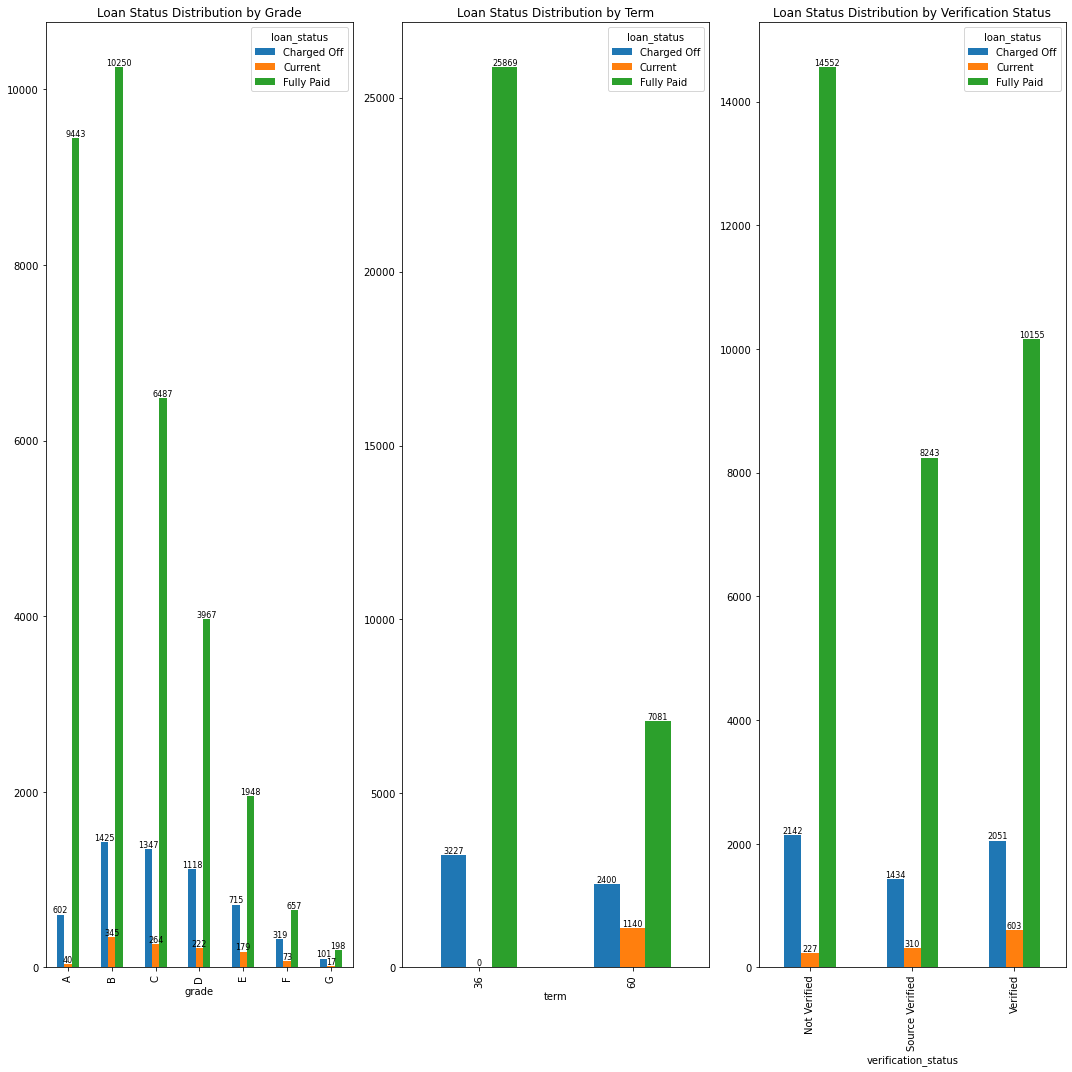

In [54]:
import pandas as pd
import matplotlib.pyplot as plt



# create subplots for each categorical column
fig, axs = plt.subplots(ncols=3, figsize=(15,15))

# plot loan_status distribution by grade
ax = loan.groupby(['grade', 'loan_status']).size().unstack().plot(kind='bar', ax=axs[0])
ax.set_title('Loan Status Distribution by Grade')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=8)

# plot loan_status distribution by term
ax = loan.groupby(['term', 'loan_status']).size().unstack().plot(kind='bar', ax=axs[1])
ax.set_title('Loan Status Distribution by Term')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=8)

# plot loan_status distribution by verification_status
ax = loan.groupby(['verification_status', 'loan_status']).size().unstack().plot(kind='bar', ax=axs[2])
ax.set_title('Loan Status Distribution by Verification Status')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=8)

# adjust spacing between subplots and show the plot
plt.tight_layout()
plt.show()

### 11.Using a user defined function convert the ‘emp_len’ column into categorical column as follows -
### If emp_len is less than equals to 1 then recode as ‘fresher’.
### If emp_len is greater than 1 and less than 3 then recode as ‘junior’.
### If emp_len is greater than 3 and less than 7 then recode as ‘senior’
### If emp_len is greater than 7 then recode as ‘expert’.


In [70]:
def convert(x):
    new_list=[]
    for i in x:
        if i <=1:
            new_list.append("Fresher")
        elif i>1 and i<=3:
            new_list.append("Junior")
        elif i>3 and i<=7:
            new_list.append("Senior")
        else:
            new_list.append("Expert")
    return new_list

In [71]:
loan["emp_length"]=convert(loan['emp_length'])

In [72]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,risky_loan
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,Expert,...,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,Fresher,...,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,Expert,...,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,Expert,...,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,Fresher,...,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,0


### 12. Find the sum of ‘loan_amnt’ for each grade and display the distribution of ‘loan_amnt’ using a pie plot .

In [73]:
loan.groupby(by="grade").loan_amnt.sum()

grade
A     86982400
B    133651350
C     89115825
D     65160400
E     45037900
F     19263100
G      6391675
Name: loan_amnt, dtype: int64

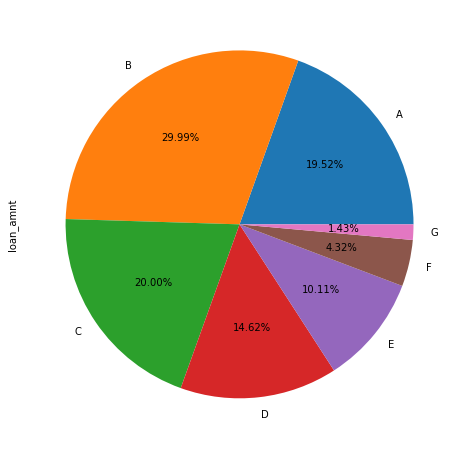

In [81]:
loan.groupby(by="grade").loan_amnt.sum().plot.pie(subplots=True,figsize=(15,8),autopct='%.2f%%');